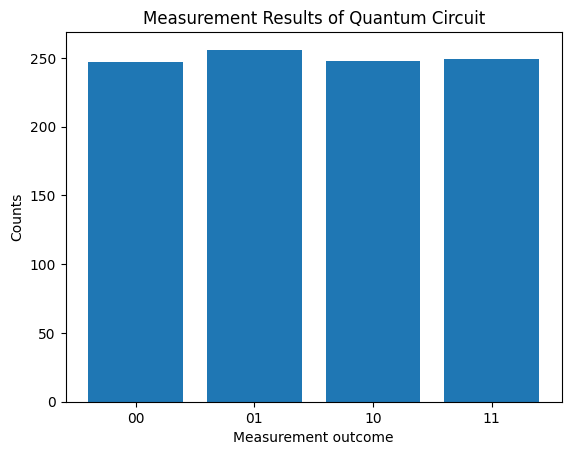

0: ───X───────X───T^-1───H───M('result')───
              │              │
1: ───H───T───@──────────────M─────────────

In [3]:
import cirq
import matplotlib.pyplot as plt

def cirq_implementation():
    # Create two qubits
    q0, q1 = cirq.LineQubit.range(2)
    
    # Create circuit
    circuit = cirq.Circuit()
    
    # Initialize q[0] to |1⟩
    circuit.append(cirq.X(q0))
    
    # Apply Hadamard to q[1]
    circuit.append(cirq.H(q1))
    
    # Apply phase gate to q[1]
    circuit.append(cirq.ZPowGate(exponent=0.25)(q1))  # π/4 phase
    
    # Apply CNOT with q[1] as control and q[0] as target
    circuit.append(cirq.CNOT(q1, q0))
    
    # Apply negative phase gate to q[0]
    circuit.append(cirq.ZPowGate(exponent=-0.25)(q0))  # -π/4 phase
    
    # Apply final Hadamard to q[0]
    circuit.append(cirq.H(q0))
    
    # Measurement
    circuit.append(cirq.measure(q0, q1, key='result'))
    
    # Simulate the circuit
    simulator = cirq.Simulator()
    results = simulator.run(circuit, repetitions=1000)
    histogram = results.histogram(key='result')

    # Plot the histogram
    plt.bar(histogram.keys(), histogram.values(), tick_label=[f"{bin(key)[2:].zfill(2)}" for key in histogram.keys()])
    plt.xlabel('Measurement outcome')
    plt.ylabel('Counts')
    plt.title('Measurement Results of Quantum Circuit')
    plt.show()

    return circuit  # Optionally, return the circuit for inspection

# To run the function and see output
cirq_implementation()
